In [1]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

26427392it [00:02, 13167576.72it/s]                              


Extracting /tmp/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 98469.32it/s]            
0it [00:00, ?it/s]

Extracting /tmp/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 4082214.02it/s]                             
0it [00:00, ?it/s]

Extracting /tmp/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 34623.54it/s]            

Extracting /tmp/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [2]:
class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Linear(784, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 10)
        
    def forward(self, x):
        
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        
        x = F.log_softmax(self.layer4(x), dim = 1)
        return x
        

In [3]:
model = MyNetwork()

In [4]:
model

MyNetwork(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=10, bias=True)
)

In [5]:
criterion = nn.NLLLoss()

optimizer = optim.Adam(model.parameters(), lr = 0.003)

In [6]:
images, labels = next(iter(trainloader))

In [7]:
images.shape

torch.Size([64, 1, 28, 28])

In [8]:
outputs = model(images)

In [9]:
ps = torch.exp(outputs)

In [10]:
ps.shape

torch.Size([64, 10])

In [11]:
top_p, top_class = ps.topk(1, dim = 1)

In [12]:
top_class[:10]

tensor([[8],
        [8],
        [8],
        [8],
        [8],
        [8],
        [8],
        [8],
        [8],
        [8]])

In [13]:
equals = top_class == labels.view(*top_class.shape)

In [14]:
equals.shape

torch.Size([64, 1])

In [15]:
labels.shape

torch.Size([64])

In [16]:
top_class.shape

torch.Size([64, 1])

In [17]:
equals.type()

'torch.ByteTensor'

In [18]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 12.5%


In [19]:
epochs = 20

train_losses = []
test_losses = []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for images, labels in testloader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                
                ps = torch.exp(outputs)
                top_p, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        print("Epoch number : ", e + 1)
        print("Training loss : ", running_loss / len(trainloader))
        print("Test loss : ", test_loss / len(testloader))
        print("Test accuracy : ", accuracy.item() / len(testloader))
        print("=======================================================")

Epoch number :  1
Training loss :  0.5157662986088664
Test loss :  0.4240908077947653
Test accuracy :  0.8449442675159236
Epoch number :  2
Training loss :  0.3879256694079208
Test loss :  0.4762214706961516
Test accuracy :  0.8349920382165605
Epoch number :  3
Training loss :  0.35365595449326137
Test loss :  0.41629782209920274
Test accuracy :  0.852906050955414
Epoch number :  4
Training loss :  0.33171511337415244
Test loss :  0.3770563591058087
Test accuracy :  0.8641520700636943
Epoch number :  5
Training loss :  0.3154579223489075
Test loss :  0.3664586764232368
Test accuracy :  0.8674363057324841
Epoch number :  6
Training loss :  0.30048314091175604
Test loss :  0.368930955601346
Test accuracy :  0.8705214968152867
Epoch number :  7
Training loss :  0.29023675954958267
Test loss :  0.362804926314931
Test accuracy :  0.8737062101910829
Epoch number :  8
Training loss :  0.280522444982455
Test loss :  0.35043381505711063
Test accuracy :  0.8736066878980892
Epoch number :  9
Trai

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

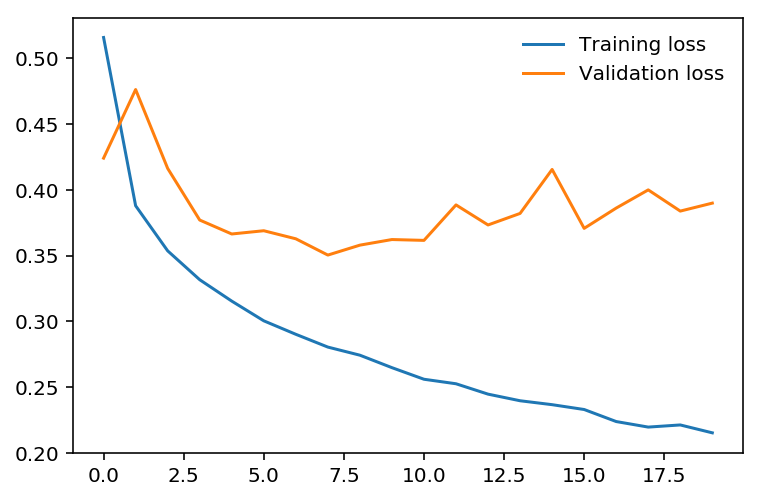

In [21]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [22]:
class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Linear(784, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 10)
        
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.layer1(x)))
        x = self.dropout(F.relu(self.layer2(x)))
        x = self.dropout(F.relu(self.layer3(x)))
        
        x = F.log_softmax(self.layer4(x), dim = 1)
        return x
        

In [23]:
model = MyNetwork()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

In [24]:
epochs = 20

train_losses = []
test_losses = []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                
                ps = torch.exp(outputs)
                top_p, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        print("Epoch number : ", e + 1)
        print("Training loss : ", running_loss / len(trainloader))
        print("Test loss : ", test_loss / len(testloader))
        print("Test accuracy : ", accuracy.item() / len(testloader))
        print("=======================================================")

Epoch number :  1
Training loss :  0.6094824254576331
Test loss :  0.49503403769177234
Test accuracy :  0.8183718152866242
Epoch number :  2
Training loss :  0.4864477809431202
Test loss :  0.4579052856773328
Test accuracy :  0.8401671974522293
Epoch number :  3
Training loss :  0.45049822551291635
Test loss :  0.42959168002863596
Test accuracy :  0.8508160828025477
Epoch number :  4
Training loss :  0.4313228099839265
Test loss :  0.40158952801090897
Test accuracy :  0.8553941082802548
Epoch number :  5
Training loss :  0.417957306845483
Test loss :  0.4013388432135248
Test accuracy :  0.8584792993630573
Epoch number :  6
Training loss :  0.4076050439877297
Test loss :  0.39677948053855044
Test accuracy :  0.8590764331210191
Epoch number :  7
Training loss :  0.39937199251865274
Test loss :  0.3965379031030995
Test accuracy :  0.863156847133758
Epoch number :  8
Training loss :  0.403642482960275
Test loss :  0.3936091168860721
Test accuracy :  0.8588773885350318
Epoch number :  9
Tra

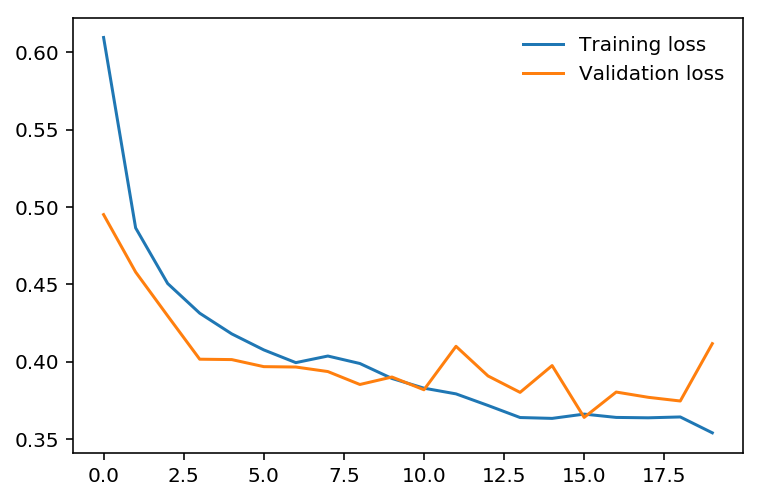

In [25]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [26]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 MyNetwork(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
) 

The state dict keys: 

 odict_keys(['layer1.weight', 'layer1.bias', 'layer2.weight', 'layer2.bias', 'layer3.weight', 'layer3.bias', 'layer4.weight', 'layer4.bias'])


In [27]:
torch.save(model.state_dict(), '/kaggle/working/checkpoint.pth')

In [28]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['layer1.weight', 'layer1.bias', 'layer2.weight', 'layer2.bias', 'layer3.weight', 'layer3.bias', 'layer4.weight', 'layer4.bias'])


In [29]:
model.load_state_dict(state_dict)

In [30]:
# when we load models we need to make sure our architectures match hence we can save more information while saving our models
# something like this for example

# checkpoint = {'input_size': 784,
#               'output_size': 10,
#               'hidden_layers': [each.out_features for each in model.hidden_layers],
#               'state_dict': model.state_dict()}

# torch.save(checkpoint, 'checkpoint.pth')